# Analysis of influence living conditions of pupils to the  score of the Mathematic


This Dataset gives us an information about different aspects of pupils life in connection of their school performance.
With this data I will answer the following questions:
    1. Which influence to mathematical score has famaly sitution?
    2. Which influence to mathematical score has stress factors?
    3. The role of intensity of the educational process?
    4. The most common factors affecting the absence?
    5. The combination of factors forming a risk group?


In [487]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
pd.set_option('display.max_rows', 50) #to show more rows
pd.set_option('display.max_columns', 50) #to show more columns



In [488]:
stud_math=pd.read_csv('stud_math.csv')
stud_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [489]:
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [490]:
stud_math.isnull().sum() 

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

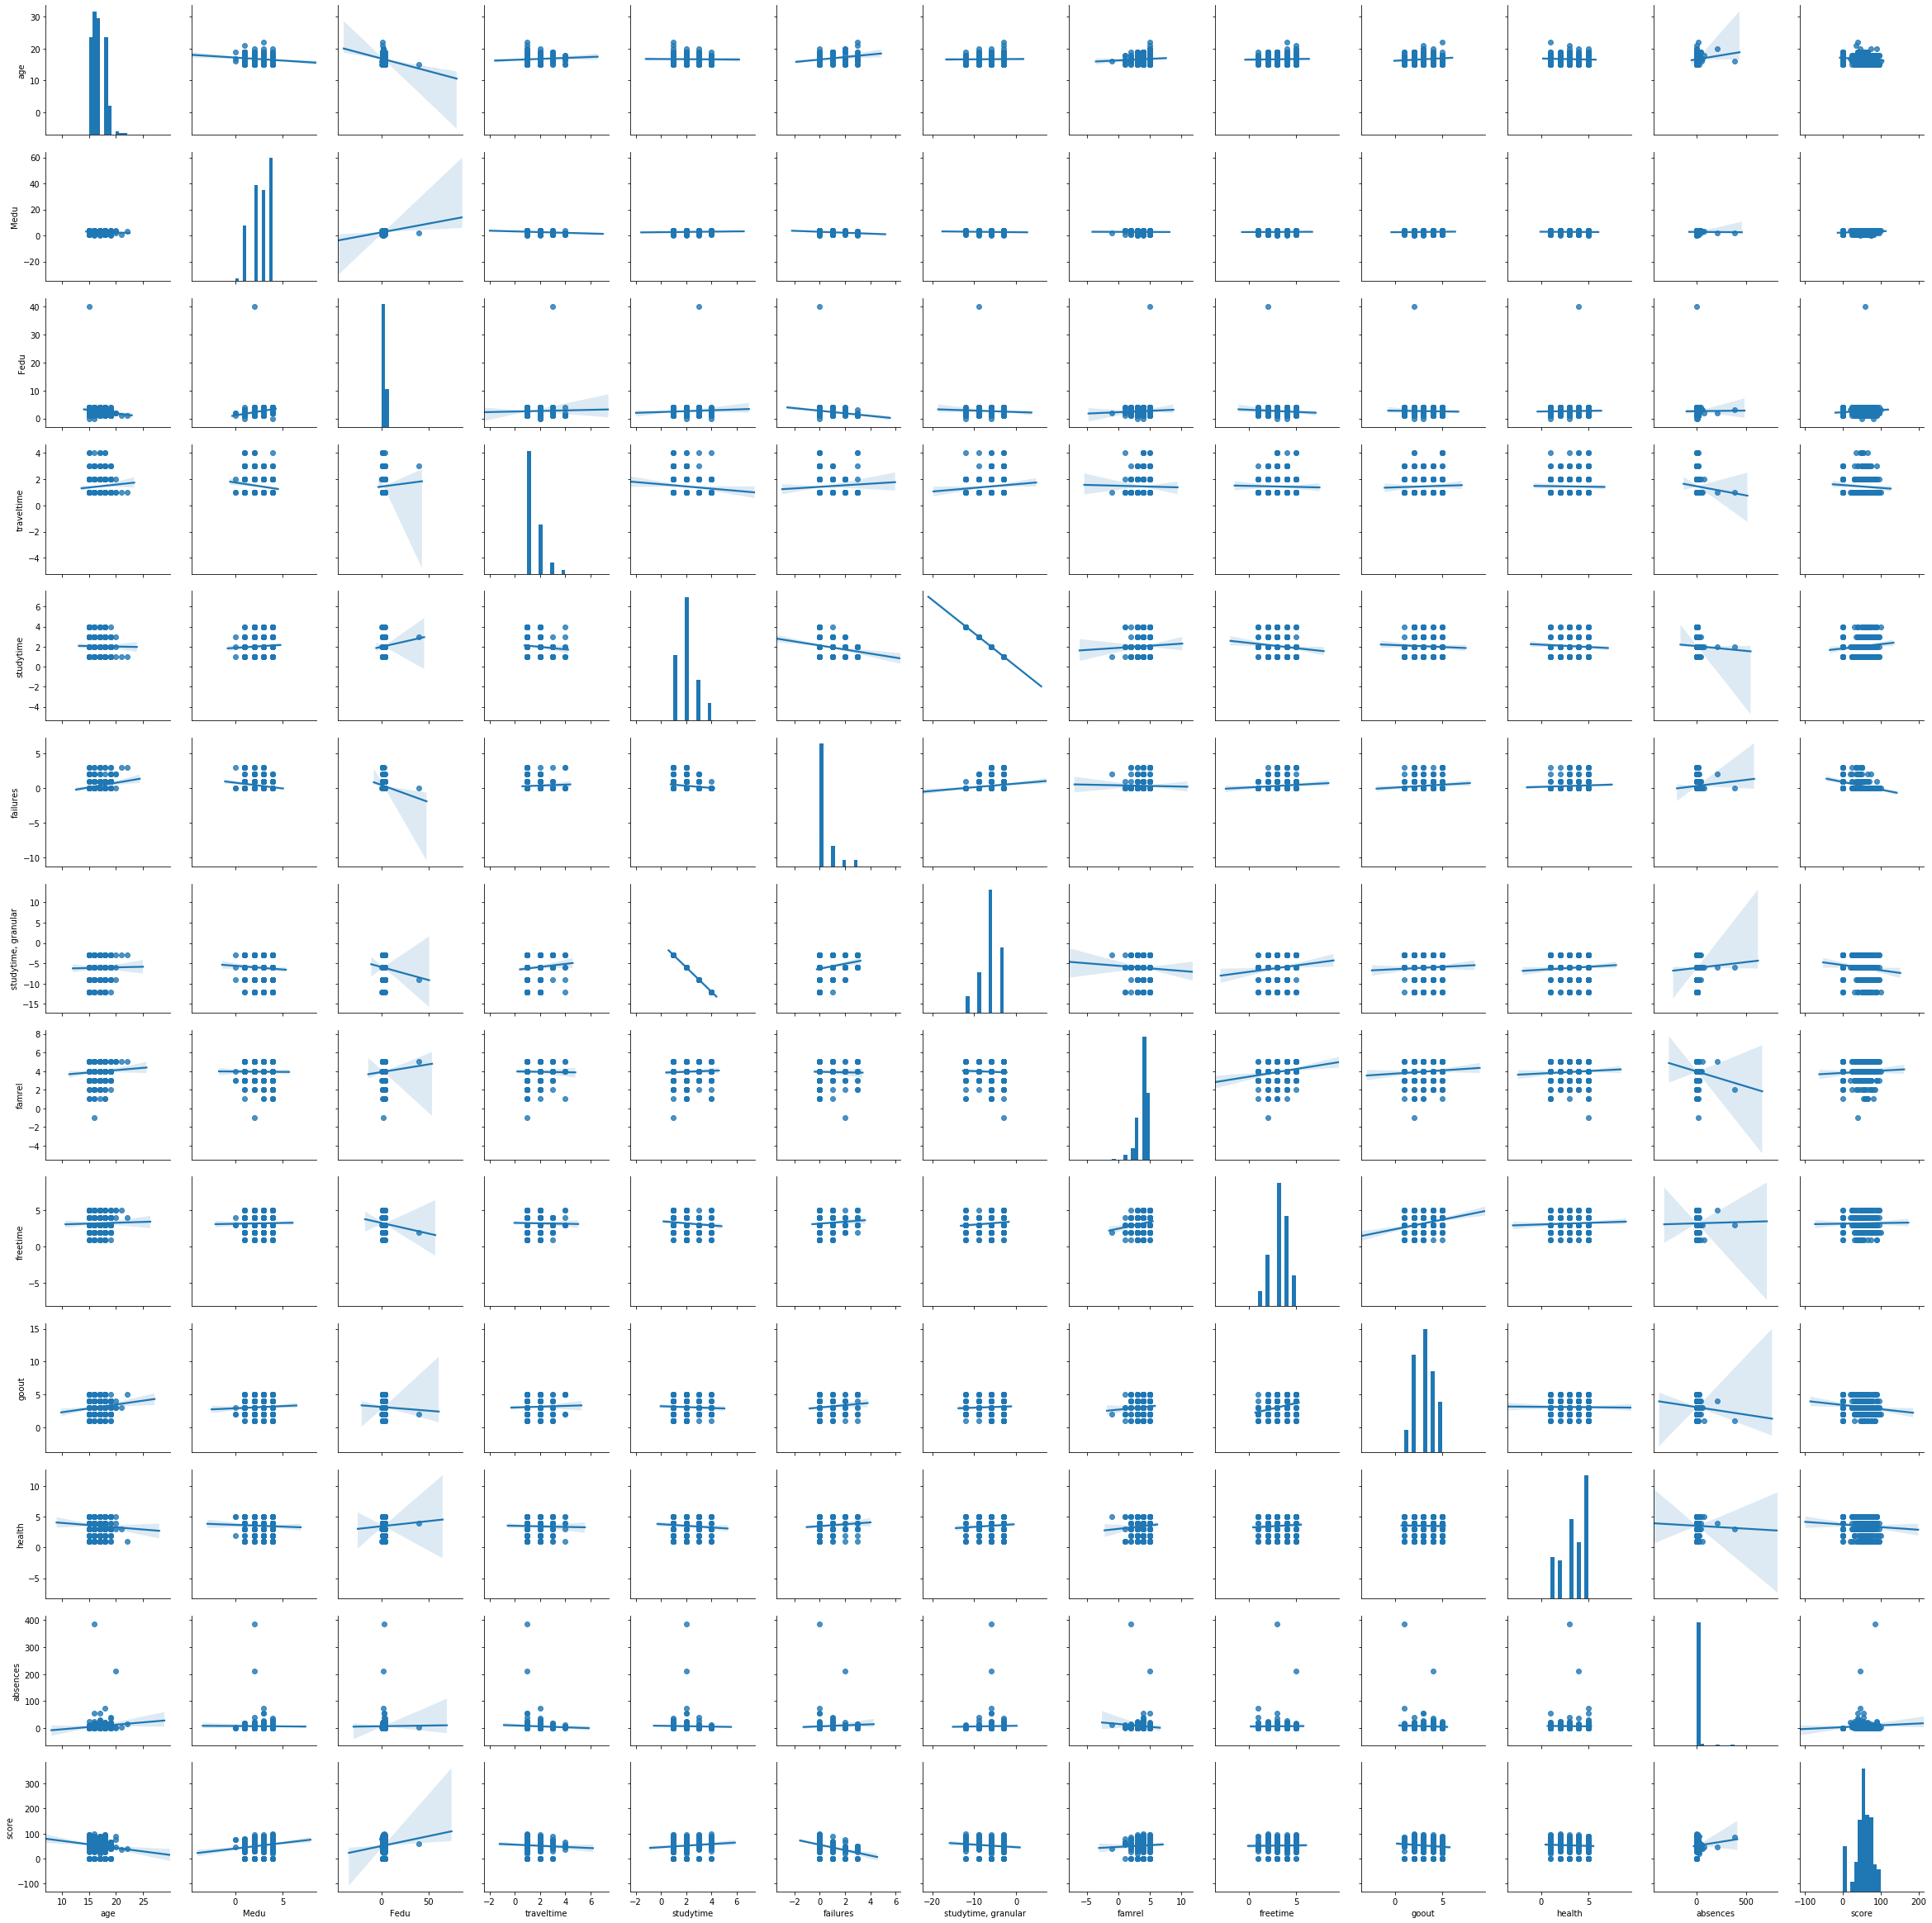

In [526]:
sns.pairplot(stud_math, kind='reg')

As we see we have a big amount of columns so we will devide the DataFtrame to parts according to a subject of analysis.

Let's start to discover the family situation of pupils and its influence on mathematical performance.

In [491]:
fam_sit=stud_math[['sex','age','famsize','Pstatus','Medu', 'Fedu', 'Mjob','Fjob','guardian','traveltime', 'famrel', 'absences', 'score']]
fam_sit

,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,famrel,absences,score
0,F,18,NaN,A,4.0,4.0,at_home,teacher,mother,2.0,4.0,6.0,30.0
1,F,17,GT3,NaN,1.0,1.0,at_home,other,father,1.0,5.0,4.0,30.0
2,F,15,LE3,T,1.0,1.0,at_home,other,mother,1.0,4.0,10.0,50.0
3,F,15,GT3,T,4.0,2.0,health,NaN,mother,1.0,3.0,2.0,75.0
4,F,16,GT3,T,3.0,3.0,other,other,father,1.0,4.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20,LE3,A,2.0,2.0,services,services,NaN,1.0,5.0,212.0,45.0
391,M,17,LE3,T,3.0,1.0,services,services,mother,2.0,2.0,3.0,80.0
392,M,21,GT3,T,1.0,1.0,other,other,NaN,1.0,5.0,3.0,35.0
393,M,18,LE3,T,3.0,2.0,services,other,mother,3.0,4.0,0.0,50.0


Let's see sex and age ratio in DataFrame:

F    208
M    187
Name: sex, dtype: int64


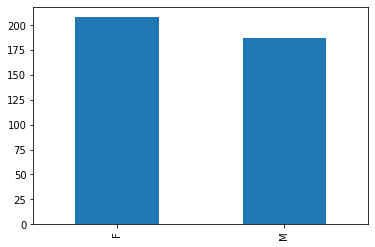

In [492]:
print(fam_sit.sex.value_counts())
fam_sit.sex.value_counts().plot(kind='bar')


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

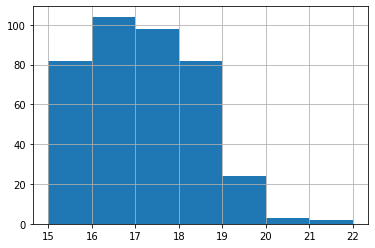

In [493]:
fam_sit.age.hist(bins=7)
fam_sit.age.describe()

Let's check wether we have some outliers here:

In [494]:
median=fam_sit.age.median()
perc25=fam_sit.age.quantile(0.25)
perc75=fam_sit.age.quantile(0.75)
IQR=perc75-perc25
print('25% percentile:{},'.format(perc25), '75% percentile:{},'.format(perc75), 'IQR:{},'.format(IQR), 'limits of outliers: [{f},{l}]'.format(f=perc25-1.5*IQR, l=perc75+1.5*IQR))
#outliers_age=stud_math.age.loc[stud_math.age>21]

print('there are {} pupils older then 21 years old'.format(len(outliers_age)))



25% percentile:16.0, 75% percentile:18.0, IQR:2.0, limits of outliers: [13.0,21.0]
there are 1 pupils older then 21 years old


We will need do repeat this for the other columns so lets's extract code to function

In [495]:
def range_outliers(x):
    xmedian=x.median()
    xperc25=x.quantile(0.25)
    xperc75=x.quantile(0.75)
    xIQR=xperc75-xperc25
    print('median:{},'.format(xmedian),'25% percentile:{},'.format(xperc25), '75% percentile:{},'.format(xperc75), 'IQR:{},'.format(xIQR), 'limits of outliers: [{f},{l}]'.format(f=xperc25-1.5*xIQR, l=xperc75+1.5*xIQR))



The famaly size column gives us an information about greater or less then 3 members have families.

GT3    261
LE3    107
nan     27
Name: famsize, dtype: int64


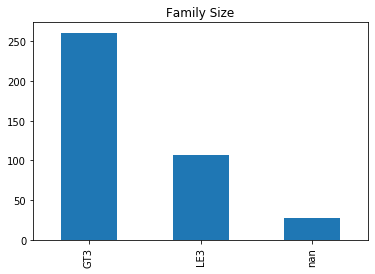

In [496]:
fam_sit.famsize=fam_sit.famsize.apply(lambda x: None if str(x).strip() == '' else x)
print(fam_sit.famsize.astype(str).value_counts())
fam_sit.famsize.astype(str).value_counts().plot(kind='bar', title='Family Size')


Let's fill the Nan with the Mode value:

GT3    262
LE3    107
Name: famsize, dtype: int64

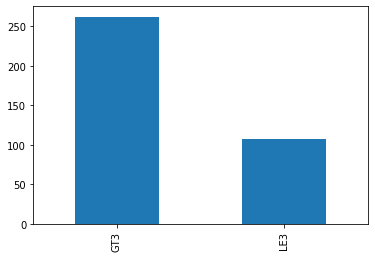

In [497]:
fam_sit.famsize=fam_sit.famsize.fillna(value=fam_sit.famsize.mode()) 
fam_sit.famsize.value_counts().plot(kind='bar')
fam_sit.famsize.value_counts()


To copy-paste less and reduce boilerpate let's extract code to functions:

In [498]:
#The function for the first observation of the columns
def data_ask(x):
    x1 = x.apply(lambda x: None if str(x).strip() == '' else x)
    print(x1.astype(str).value_counts())
    x1.astype(str).value_counts().plot(kind='bar')
    return x1

In [499]:
#The function for filling the gaps 
def data_corr(b, repl):
    b1=b.fillna(repl)
    print(b1.astype(str).value_counts())
    b1.astype(str).value_counts().plot(kind='bar')
    return  b1

Let's apply the functions to the next columns:

T      314
nan     45
A       36
Name: Pstatus, dtype: int64


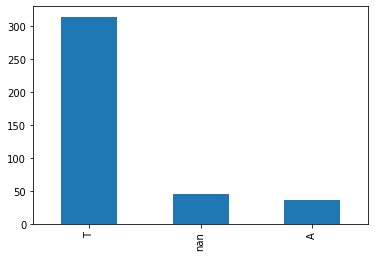

In [500]:
fam_sit.Pstatus=data_ask(fam_sit.Pstatus)

In this keys we see that amount of 'A' value is less then None. So let's try to  fill None using information from guardian column. 
Suppose that pupils that have 'other' guardian should have also 'A' Pstatus. Guardian column has also some gaps. Let's fill them with the "other" if the corresponding Pstatus column has None.

In [501]:
#Here we can prove that in this approach we can define some values of PStatus
status_guardian=stud_math[['Pstatus', 'guardian']]
status_guardian.loc[(status_guardian.Pstatus!='T')&(status_guardian.Pstatus!='A')&(status_guardian.guardian!='mother')&(status_guardian.guardian!='father')]


,Pstatus,guardian
81,NaN,NaN
210,NaN,other
307,NaN,other
313,NaN,other
333,NaN,other
364,NaN,NaN


In [502]:
#def fill_address(row):
#        if (row.Pstatus=='A') & (row.guardian == None):
#            return 'other'
#        else:
#            return row.guardian        
    
#
#stud_math['guardian_filled']=stud_math.apply(fill_address, axis=1)
#stud_math


In [503]:
def fill_guardian(row):
        if (row.Pstatus=='A') & (row.guardian == None):
            return 'other'
        else:
            return row.guardian        
    
#fill_address(stud_math)        
#stud_math['nnn'] = stud_math.apply(fill_address, axis=1)
fam_sit['guardian_filled']=fam_sit.apply(fill_guardian, axis=1)
fam_sit


C:\Users\trigu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,famrel,absences,score,guardian_filled
0,F,18,GT3,A,4.0,4.0,at_home,teacher,mother,2.0,4.0,6.0,30.0,mother
1,F,17,GT3,NaN,1.0,1.0,at_home,other,father,1.0,5.0,4.0,30.0,father
2,F,15,LE3,T,1.0,1.0,at_home,other,mother,1.0,4.0,10.0,50.0,mother
3,F,15,GT3,T,4.0,2.0,health,NaN,mother,1.0,3.0,2.0,75.0,mother
4,F,16,GT3,T,3.0,3.0,other,other,father,1.0,4.0,4.0,50.0,father
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20,LE3,A,2.0,2.0,services,services,NaN,1.0,5.0,212.0,45.0,NaN
391,M,17,LE3,T,3.0,1.0,services,services,mother,2.0,2.0,3.0,80.0,mother
392,M,21,GT3,T,1.0,1.0,other,other,NaN,1.0,5.0,3.0,35.0,NaN
393,M,18,LE3,T,3.0,2.0,services,other,mother,3.0,4.0,0.0,50.0,mother


In [504]:
def fill_pstatus(row):
        if (row.Pstatus==None) & (row.guardian == 'other'):
            return 'A'
        else:
            return row.Pstatus        
    
#fill_address(stud_math)        
#stud_math['nnn'] = stud_math.apply(fill_address, axis=1)
fam_sit['Pstatus_filled']=fam_sit.apply(fill_pstatus, axis=1)
fam_sit

C:\Users\trigu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,famrel,absences,score,guardian_filled,Pstatus_filled
0,F,18,GT3,A,4.0,4.0,at_home,teacher,mother,2.0,4.0,6.0,30.0,mother,A
1,F,17,GT3,NaN,1.0,1.0,at_home,other,father,1.0,5.0,4.0,30.0,father,NaN
2,F,15,LE3,T,1.0,1.0,at_home,other,mother,1.0,4.0,10.0,50.0,mother,T
3,F,15,GT3,T,4.0,2.0,health,NaN,mother,1.0,3.0,2.0,75.0,mother,T
4,F,16,GT3,T,3.0,3.0,other,other,father,1.0,4.0,4.0,50.0,father,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20,LE3,A,2.0,2.0,services,services,NaN,1.0,5.0,212.0,45.0,NaN,A
391,M,17,LE3,T,3.0,1.0,services,services,mother,2.0,2.0,3.0,80.0,mother,T
392,M,21,GT3,T,1.0,1.0,other,other,NaN,1.0,5.0,3.0,35.0,NaN,T
393,M,18,LE3,T,3.0,2.0,services,other,mother,3.0,4.0,0.0,50.0,mother,T


In [505]:
fam_sit.Pstatus_filled.fillna('T', inplace=True)

fam_sit.drop(['Pstatus', 'guardian', 'guardian_filled'], axis=1)

C:\Users\trigu\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,sex,age,famsize,Medu,Fedu,Mjob,Fjob,traveltime,famrel,absences,score,Pstatus_filled
0,F,18,GT3,4.0,4.0,at_home,teacher,2.0,4.0,6.0,30.0,A
1,F,17,GT3,1.0,1.0,at_home,other,1.0,5.0,4.0,30.0,T
2,F,15,LE3,1.0,1.0,at_home,other,1.0,4.0,10.0,50.0,T
3,F,15,GT3,4.0,2.0,health,NaN,1.0,3.0,2.0,75.0,T
4,F,16,GT3,3.0,3.0,other,other,1.0,4.0,4.0,50.0,T
...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20,LE3,2.0,2.0,services,services,1.0,5.0,212.0,45.0,A
391,M,17,LE3,3.0,1.0,services,services,2.0,2.0,3.0,80.0,T
392,M,21,GT3,1.0,1.0,other,other,1.0,5.0,3.0,35.0,T
393,M,18,LE3,3.0,2.0,services,other,3.0,4.0,0.0,50.0,T


4.0    131
2.0    102
3.0     97
1.0     59
nan      3
0.0      3
Name: Medu, dtype: int64


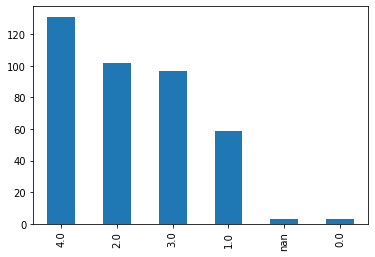

In [506]:
fam_sit.Medu=data_ask(fam_sit.Medu)


2.0     106
3.0      96
4.0      88
1.0      78
nan      24
0.0       2
40.0      1
Name: Fedu, dtype: int64


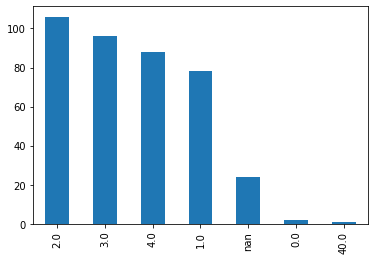

In [507]:
fam_sit.Fedu=data_ask(fam_sit.Fedu)

In [508]:
#let's replace 40.0 with 4.0
fam_sit['Fedu'].replace(40.0, 4, inplace=True)


C:\Users\trigu\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Let's prove wether some correlation between education of Mother and Father. May be we can combine them into one column. 

In [509]:
fam_sit.Fjob.astype(str).value_counts()

other       197
services    102
nan          36
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

other       233
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64


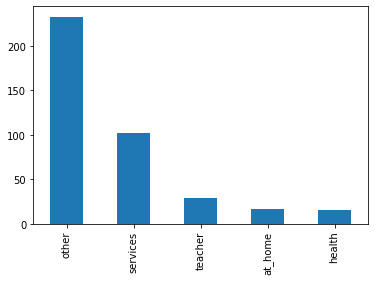

In [510]:
fam_sit.Fjob=data_corr(fam_sit.Fjob,'other')

In [511]:
fam_sit.Mjob.astype(str).value_counts()

other       133
services     98
at_home      58
teacher      55
health       32
nan          19
Name: Mjob, dtype: int64

other       152
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64


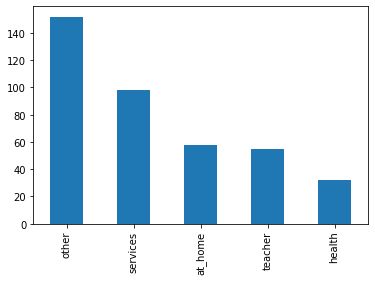

In [512]:
fam_sit.Mjob=data_corr(fam_sit.Mjob,'other')

1.0    242
2.0     96
nan     28
3.0     22
4.0      7
Name: traveltime, dtype: int64


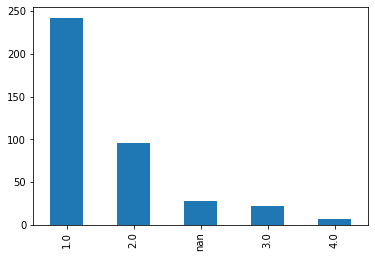

In [513]:
fam_sit.traveltime=data_ask(fam_sit.traveltime)

1.0    270
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64


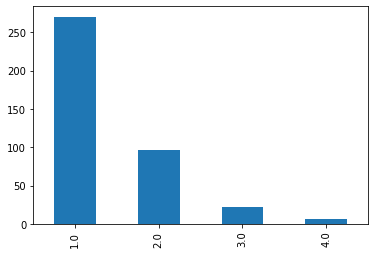

In [514]:
fam_sit.traveltime=data_corr(fam_sit.traveltime,1)

In [515]:
fam_sit.famrel.astype(str).value_counts()

4.0     182
5.0      99
3.0      62
nan      27
2.0      17
1.0       7
-1.0      1
Name: famrel, dtype: int64

4.0     209
5.0      99
3.0      62
2.0      17
1.0       7
-1.0      1
Name: famrel, dtype: int64


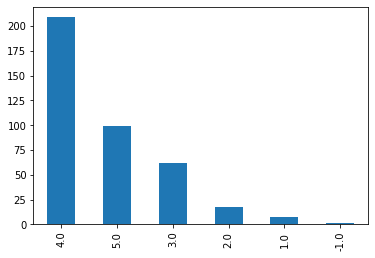

In [516]:
fam_sit.famrel=data_corr(fam_sit.famrel, 4.0)

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

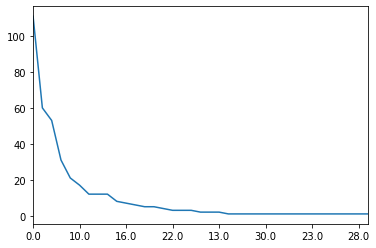

In [517]:
stud_math.absences=stud_math.absences.apply(lambda x: None if str(x).strip() == '' else x)
stud_math.absences.astype(str).value_counts().plot()
stud_math.absences.fillna(0)
stud_math.absences.describe()

In [518]:
range_outliers(fam_sit.absences)

median:4.0, 25% percentile:0.0, 75% percentile:8.0, IQR:8.0, limits of outliers: [-12.0,20.0]


There are some outliers values. They are corresponding to the pupils that had more then 20 days of absences. 

Now we can see distibution of different columns and their influence to score.

Let's start with Boxplots:

In [519]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=fam_sit.loc[fam_sit.loc[:, column].isin(fam_sit.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    

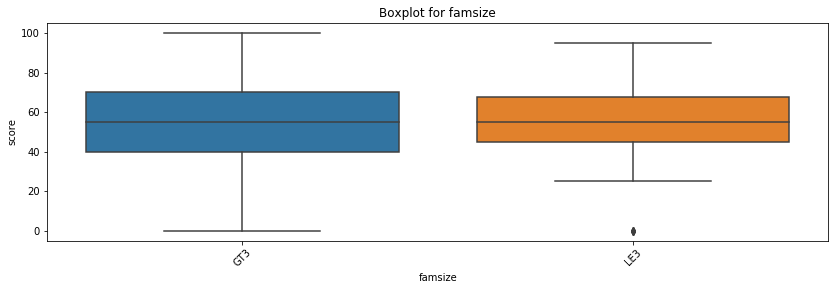

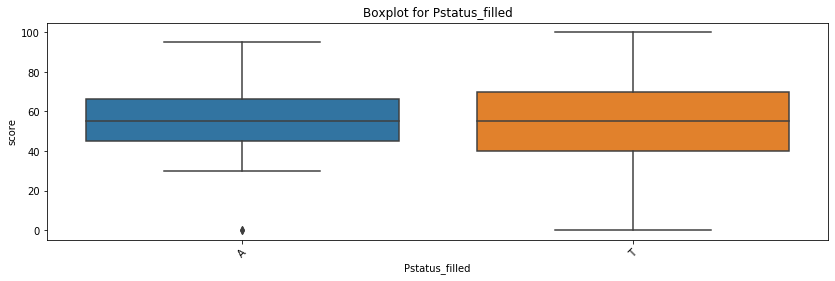

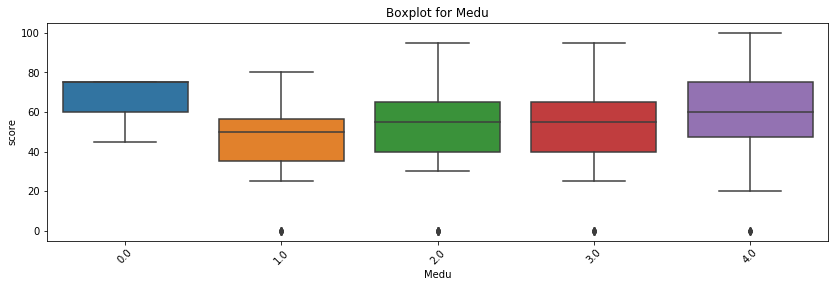

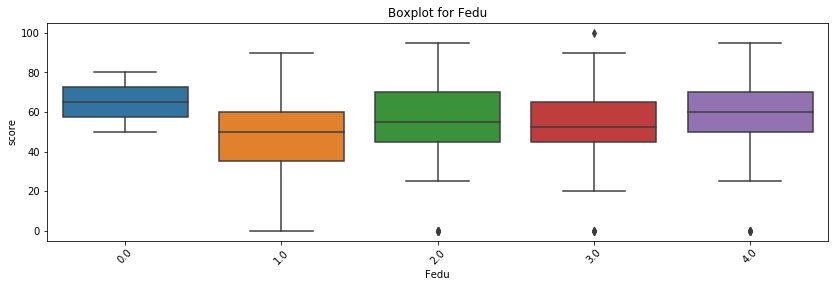

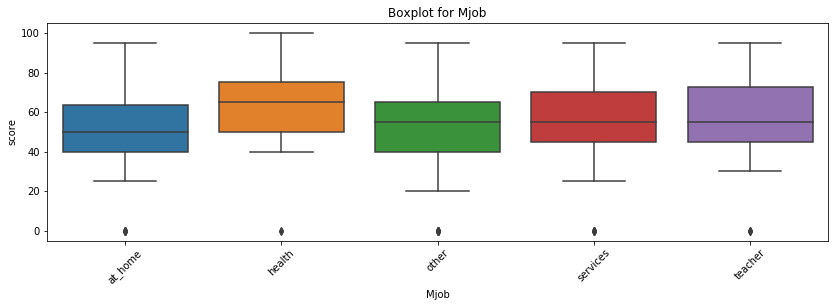

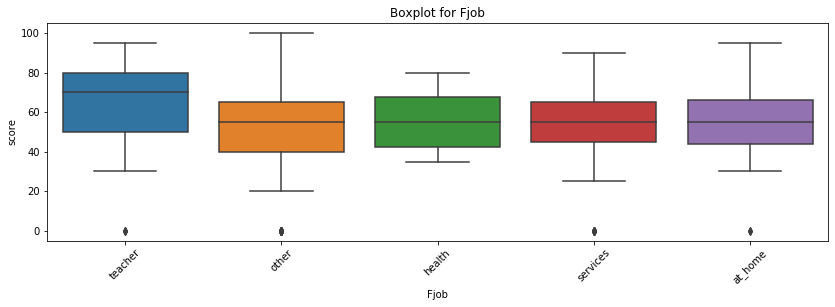

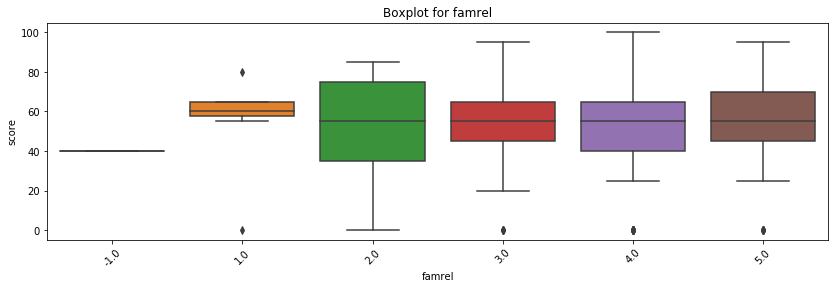

In [520]:
for col in ['famsize', 'Pstatus_filled', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'famrel']:
    get_boxplot(col)

We can see the influence of all this columns to the score. 
Let's apply Student's t-test.

In [521]:
def get_stat_dif(column):
    cols = fam_sit.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(fam_sit.loc[fam_sit.loc[:, column] == comb[0], 'score'], 
                        fam_sit.loc[fam_sit.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('We found statistically significant differences for the column', column)
            break

In [522]:
for col in ['famsize', 'Pstatus_filled', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'famrel']:
    get_stat_dif(col)

We found statistically significant differences for the column Mjob


C:\Users\trigu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\trigu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\trigu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\trigu\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\trigu\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


So we found, that the most of influence on the mathematical score has a job of the Mother.

Let's start to discover the  stress factors of pupils and their influence on mathematical performance.

In [523]:
stress=stud_math[['failures', 'freetime','health','absences','score']]
stress

,failures,freetime,health,absences,score
0,0.0,3.0,3.0,6.0,30.0
1,0.0,3.0,3.0,4.0,30.0
2,3.0,3.0,3.0,10.0,50.0
3,0.0,2.0,5.0,2.0,75.0
4,0.0,3.0,5.0,4.0,50.0
...,...,...,...,...,...
390,2.0,5.0,4.0,212.0,45.0
391,0.0,4.0,2.0,3.0,80.0
392,3.0,5.0,3.0,3.0,35.0
393,0.0,4.0,5.0,0.0,50.0


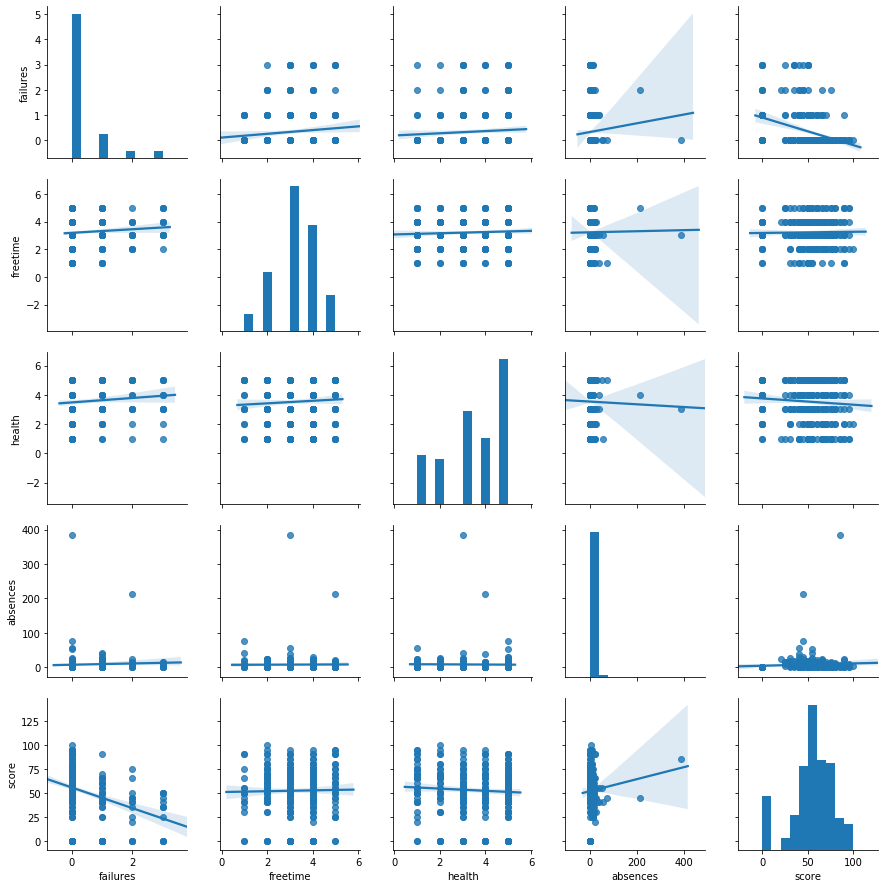

In [527]:
sns.pairplot(stress, kind='reg')

In [528]:
stress.corr()

,failures,freetime,health,absences,score
failures,1.000000,0.098382,0.081284,0.057391,-0.344338
freetime,0.098382,1.000000,0.061575,0.009292,0.019026
health,0.081284,0.061575,1.000000,-0.016222,-0.070460
absences,0.057391,0.009292,-0.016222,1.000000,0.065283
score,-0.344338,0.019026,-0.070460,0.065283,1.000000


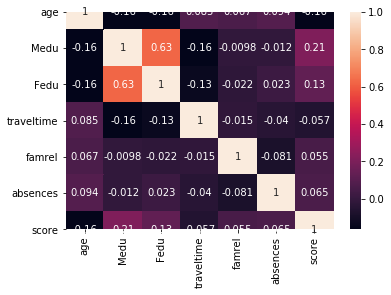

In [524]:
correlation=fam_sit.corr()
sns.heatmap(correlation, annot=True)#, cmap='coolwarm')

C:\Users\trigu\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\trigu\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


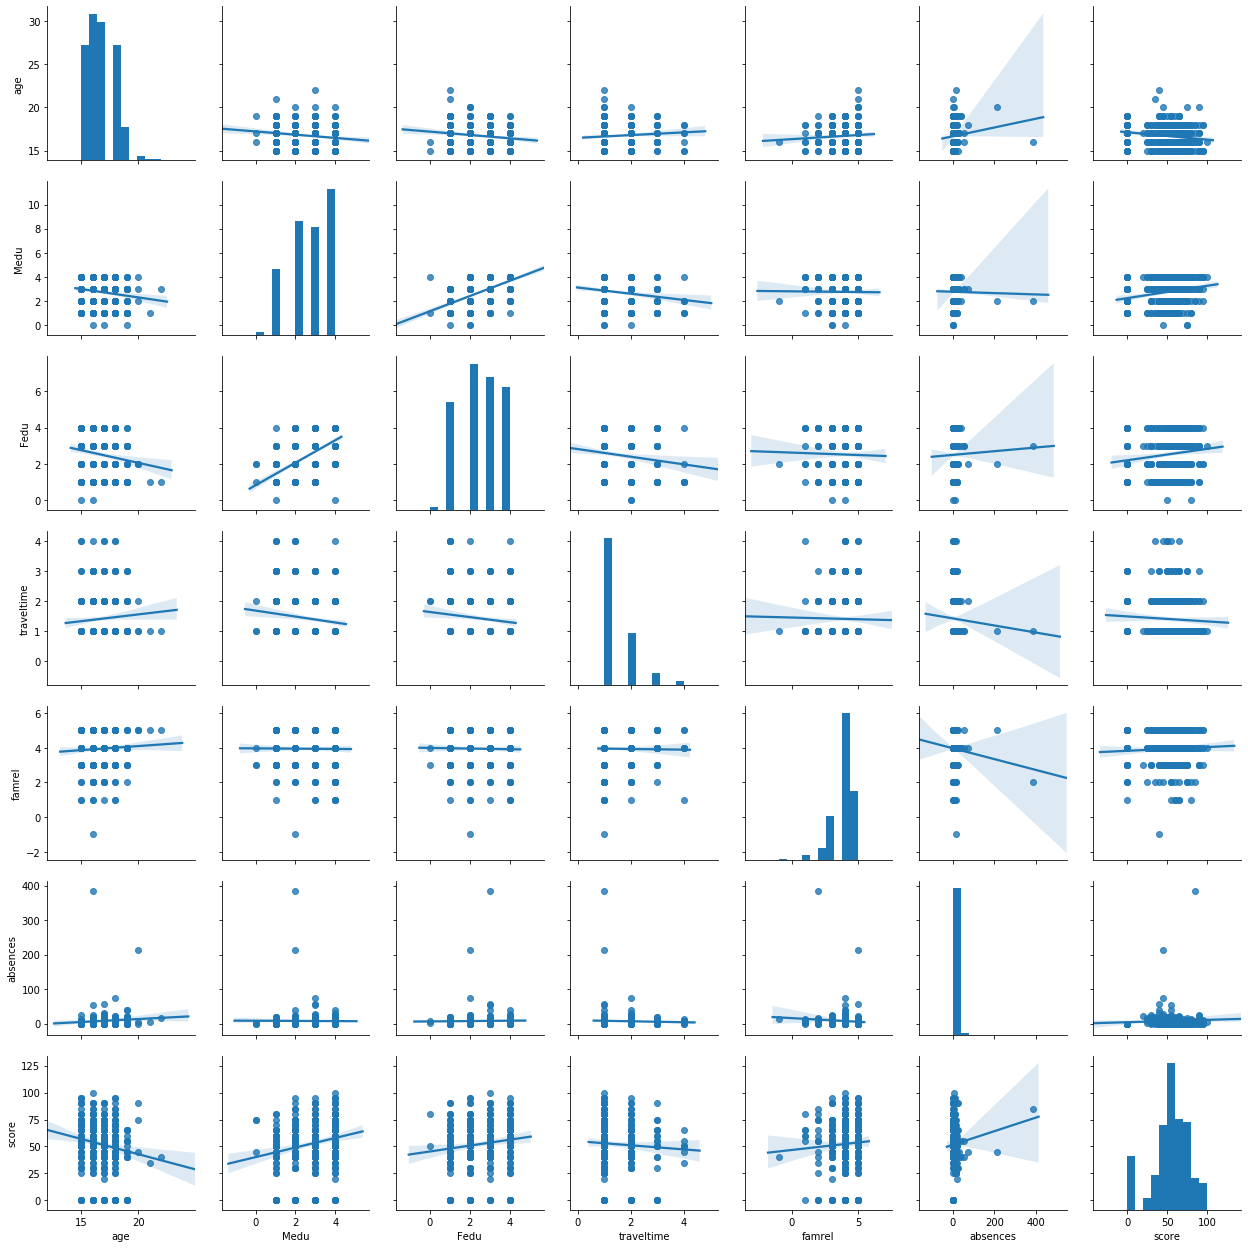

In [525]:
sns.pairplot(fam_sit, kind='reg')